In [12]:
# import packages

import matplotlib.pyplot as plt
import numpy as np
from lacbox.io import load_stats, load_oper
from pathlib import Path
from our_values import *
import pandas as pd
import os
from our_functions import  load_calculation, DEL_calculation, filter_ctrl_output, twr_clr_calculation, AEP_calculation
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator, MultipleLocator


plt.rcParams.update({'font.family': 'serif', 'font.size':16})
from matplotlib.ticker import FormatStrFormatter


# dictionary used to identify which descriptions in the HAWC2 statistics file correspond to which channels we want
# add here if needed
CHAN_DESCS = {'BldPit': 'pitch1 angle',
              'RotSpd': 'rotor speed',
              'Thrust': 'aero rotor thrust',
              'GenTrq': 'generator torque',
              'ElPow': 'pelec',
              'TbFA': 'momentmx mbdy:tower nodenr:   1',
              'TbSS': 'momentmy mbdy:tower nodenr:   1',
              'YbTilt': 'momentmx mbdy:tower nodenr:  11',
              'YbRoll': 'momentmy mbdy:tower nodenr:  11',
              'ShftTrs': 'momentmz mbdy:shaft nodenr:   4',
              'OoPBRM': 'momentmx mbdy:blade1 nodenr:   1 coo: hub1',
              'IPBRM': 'momentmy mbdy:blade1 nodenr:   1 coo: hub1',
              'FlpBRM': 'momentmx mbdy:blade1 nodenr:   1 coo: blade1',
              'EdgBRM': 'momentmy mbdy:blade1 nodenr:   1 coo: blade1',
              'OoPHub': 'momentmx mbdy:hub1 nodenr:   1 coo: hub1',
              'IPHub': 'momentmy mbdy:hub1 nodenr:   1 coo: hub1',
              'ElPow': 'pelec',
              'Twrclr': 'dll :  5 inpvec :   1  min. distance bladetips tower [m]'
              }


# OPERATIONAL DATA

In [13]:
# def load_calculation(STATS_PATH, SUBFOLDER, CHAN_DESCS, chan_ids):
#     '''
#     function that extract operational data and load from the csv file
#     in the output dictionary you can chose:
#       chan_id for the channels
#           min / mean / max for the different data set
#               minimum / average / maximum for the different arrays
#               scatter for all values in the data set
#     '''

#     value_list = ['min', 'mean', 'max']
#     data = {}

#     df, _ = load_stats(STATS_PATH, subfolder=SUBFOLDER, statstype='turb')

#     for _, chan_id in enumerate(chan_ids):

#         # isolate the channel data
#         chan_df = df.filter_channel(chan_id, CHAN_DESCS)

#         # extract hawc2 wind and channel to plot from the HAWC2 stats
#         h2_wind = chan_df['wsp']

#         data_channel = {}

#         for value in value_list:
#             HAWC2val = chan_df[value]

#             h2_wind, HAWC2val = np.array(h2_wind), np.array(HAWC2val) # wind speed, loads
#             i_h2 = np.argsort(h2_wind) # sorts indexies so the wind speed array is in ascending order

#             groups = [i_h2[i:i + 6] for i in range(0, len(i_h2), 6)]
#             nws = len(groups)
#             ws_array = np.zeros(nws)
#             average_array = np.zeros(nws)
#             max_array = np.zeros(nws)
#             min_array = np.zeros(nws)

#             for idx, group in enumerate(groups): # index, group
#                 ws_array[idx] = h2_wind[groups[idx]][0]
#                 average_array[idx] = np.mean(HAWC2val[groups[idx]])
#                 max_array[idx] = np.max(HAWC2val[groups[idx]])
#                 min_array[idx] = np.min(HAWC2val[groups[idx]])
            
#             data_value = {
#                 'scatter_wind': h2_wind[i_h2],
#                 'scatter_load': HAWC2val[i_h2],
#                 'ws': ws_array,
#                 'ave': average_array,
#                 'max': max_array,
#                 'min': min_array,
#             }

#             data_channel[value] = data_value
        
#         data[chan_id] = data_channel

#     return data


# chan_ids_operational = ['RotSpd']
# operational_rem = load_calculation('remodel/remodel_turb_stats.csv', 'tcb', CHAN_DESCS, chan_ids_operational)

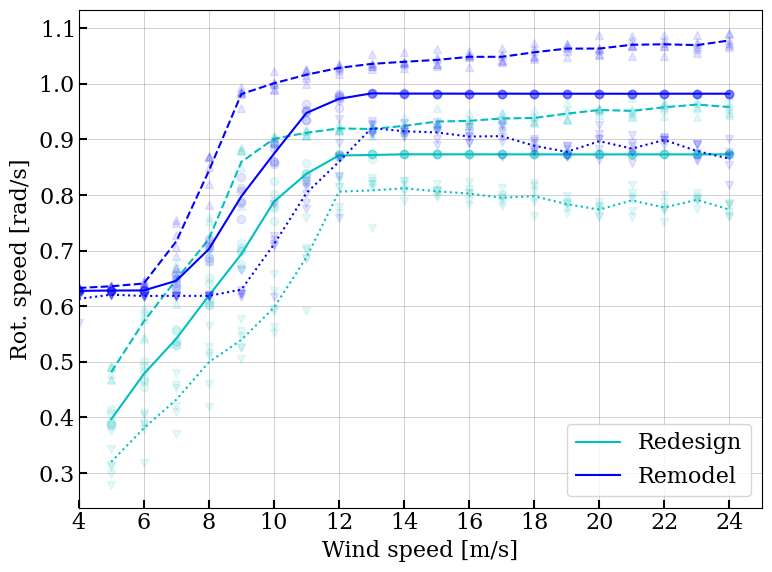

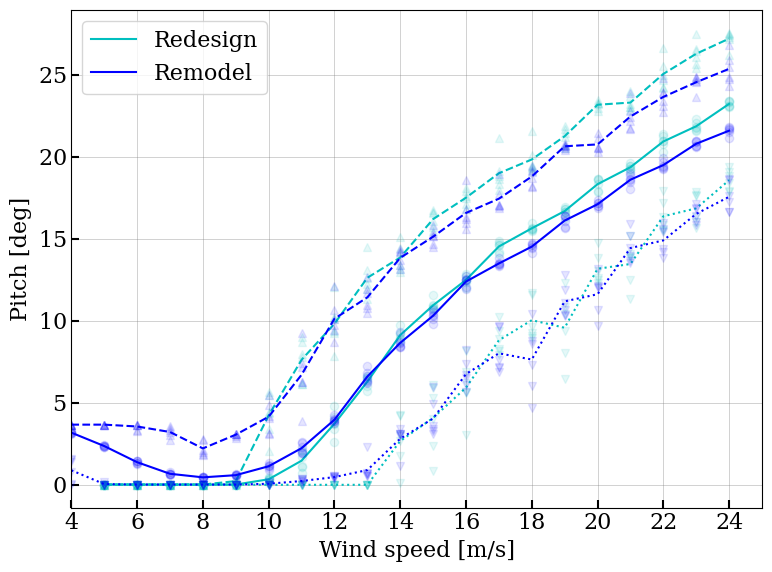

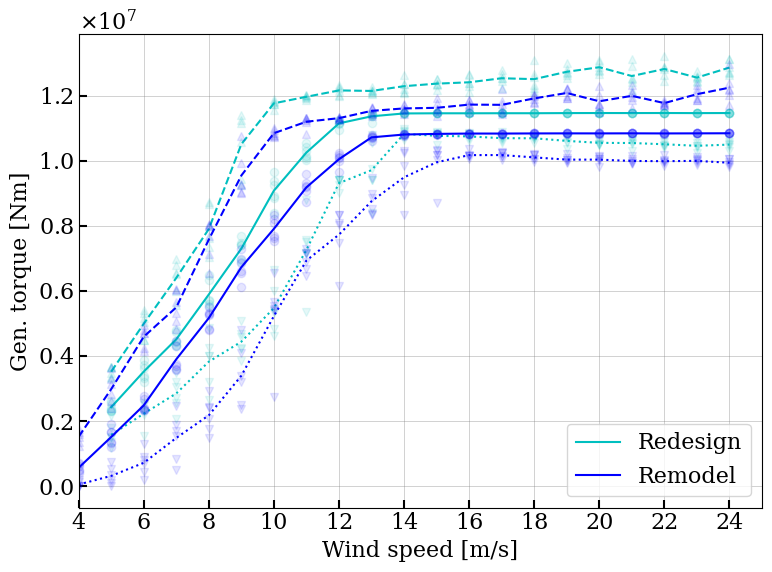

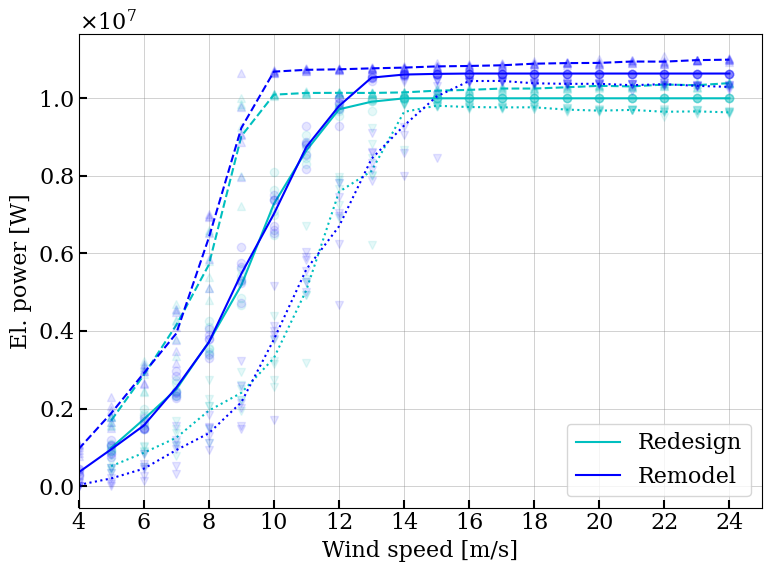

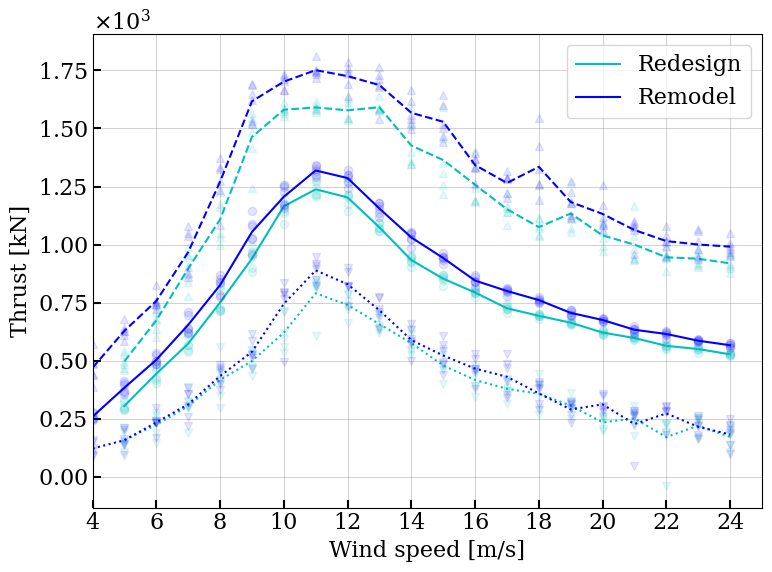

In [ ]:
# load and plot operationals and load channels


chan_ids_operational = ['RotSpd', 'BldPit', 'GenTrq', 'ElPow', 'Thrust']
chan_ids_loads = ['TbFA', 'TbSS', 'ShftTrs', 'OoPBRM', 'IPBRM']

chan_title_operational = ['Rot. speed [rad/s]', 'Pitch [deg]', 'Gen. torque [Nm]', 'El. power [W]', 'Thrust [kN]']
chan_title_loads = ['Tower base FA [kNm]', 'Tower base SS [kNm]',
             'Shaft torsion [kNm]', 'Out-of-plane BRM [kNm]', 'In-plane BRM [kNm]']


operational_DTU = load_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_operational)
operational_our = load_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_operational)
operational_rem = load_calculation('remodel/remodel_turb_C12.csv', 'tcb', CHAN_DESCS, chan_ids_operational)
loads_DTU = load_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_loads)
loads_our = load_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_loads)
loads_rem = load_calculation('remodel/remodel_turb_C12.csv', 'tcb', CHAN_DESCS, chan_ids_loads)



# Ensure the output directory exists
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)

# Generate and save plots for operational data
for iplot, chan_id in enumerate(chan_ids_operational):
    fig, ax = plt.subplots(figsize=(8, 6), clear=True)

    # # Plot DTU data
    # ax.plot(operational_DTU[chan_id]['min']['scatter_wind'], operational_DTU[chan_id]['min']['scatter_load'], 'v', alpha=0.1, color='r')
    # ax.plot(operational_DTU[chan_id]['mean']['scatter_wind'], operational_DTU[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='r')
    # ax.plot(operational_DTU[chan_id]['max']['scatter_wind'], operational_DTU[chan_id]['max']['scatter_load'], '^', alpha=0.1, color='r')
    # ax.plot(operational_DTU[chan_id]['min']['ws'], operational_DTU[chan_id]['min']['ave'], linestyle='dotted', color='r')
    # ax.plot(operational_DTU[chan_id]['mean']['ws'], operational_DTU[chan_id]['mean']['ave'], linestyle='solid', color='r', label='DTU 10 MW')
    # ax.plot(operational_DTU[chan_id]['max']['ws'], operational_DTU[chan_id]['max']['ave'], linestyle='dashed', color='r')

    # Plot redesign data
    ax.plot(operational_our[chan_id]['min']['scatter_wind'], operational_our[chan_id]['min']['scatter_load'], 'v', alpha=0.1,   color='c')
    ax.plot(operational_our[chan_id]['mean']['scatter_wind'], operational_our[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='c')
    ax.plot(operational_our[chan_id]['max']['scatter_wind'], operational_our[chan_id]['max']['scatter_load'], '^', alpha=0.1,   color='c')
    ax.plot(operational_our[chan_id]['min']['ws'], operational_our[chan_id]['min']['ave'], linestyle='dotted',  color='c')
    ax.plot(operational_our[chan_id]['mean']['ws'], operational_our[chan_id]['mean']['ave'], linestyle='solid', color='c', label='Redesign')
    ax.plot(operational_our[chan_id]['max']['ws'], operational_our[chan_id]['max']['ave'], linestyle='dashed',  color='c')

    # Plot remodel data
    ax.plot(operational_rem[chan_id]['min']['scatter_wind'],  operational_rem[chan_id]['min']['scatter_load'], 'v', alpha=0.1,  color='b')
    ax.plot(operational_rem[chan_id]['mean']['scatter_wind'], operational_rem[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='b')
    ax.plot(operational_rem[chan_id]['max']['scatter_wind'],  operational_rem[chan_id]['max']['scatter_load'], '^', alpha=0.1,  color='b')
    ax.plot(operational_rem[chan_id]['min']['ws'],  operational_rem[chan_id]['min']['ave'], linestyle='dotted', color='b')
    ax.plot(operational_rem[chan_id]['mean']['ws'], operational_rem[chan_id]['mean']['ave'], linestyle='solid', color='b', label='Remodel')
    ax.plot(operational_rem[chan_id]['max']['ws'],  operational_rem[chan_id]['max']['ave'], linestyle='dashed', color='b')


    # Configure plot appearance
    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    ax.set(xlabel='Wind speed [m/s]', ylabel=f'{chan_title_operational[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    # ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)
    ax.set_ylim(auto=True)  # Automatically set y-axis limits
    ax.xaxis.set_major_locator(MultipleLocator(2))  # Major ticks every 2 units on the x-axis

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    # Save the plot
    filename = f"{output_folder}/{chan_id}_operational.pdf"
    fig.tight_layout()
    #fig.savefig(filename, format='pdf', bbox_inches='tight')
    #plt.close(fig)
    plt.plot()


# LOAD DATA

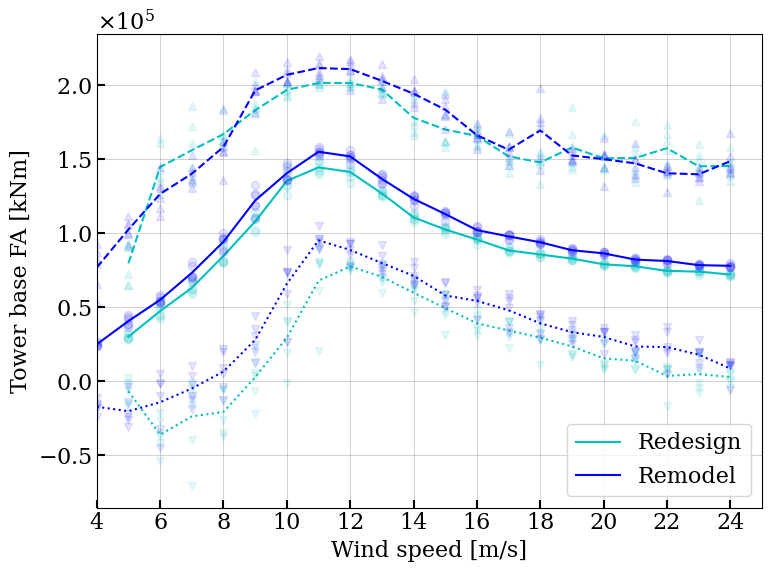

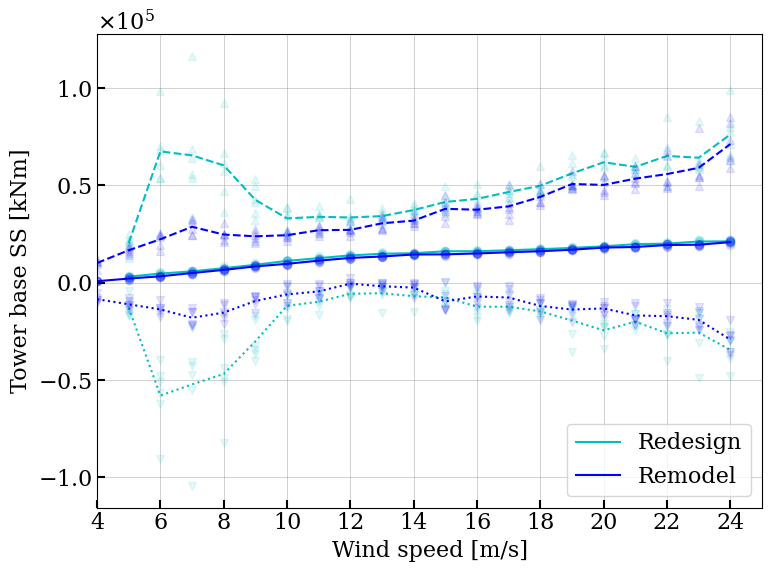

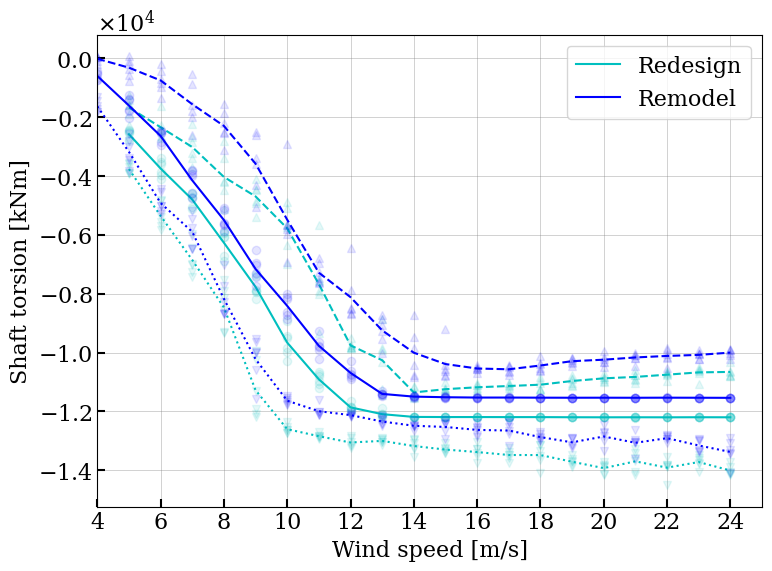

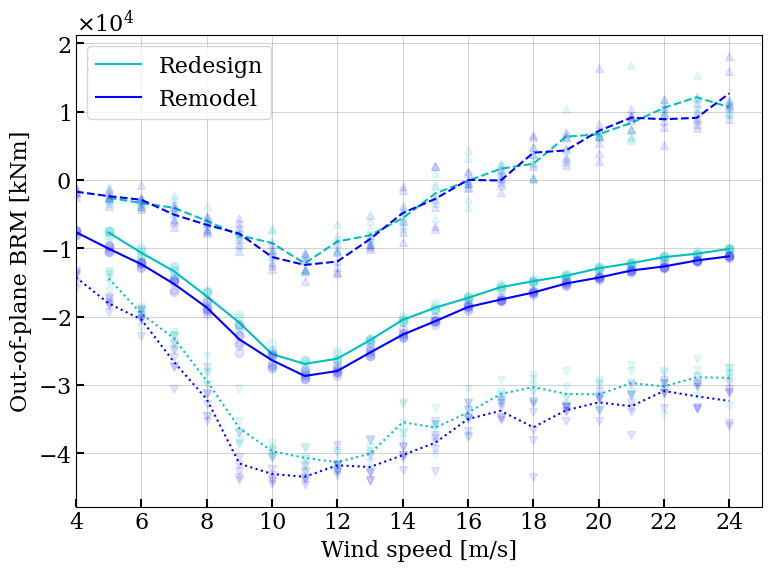

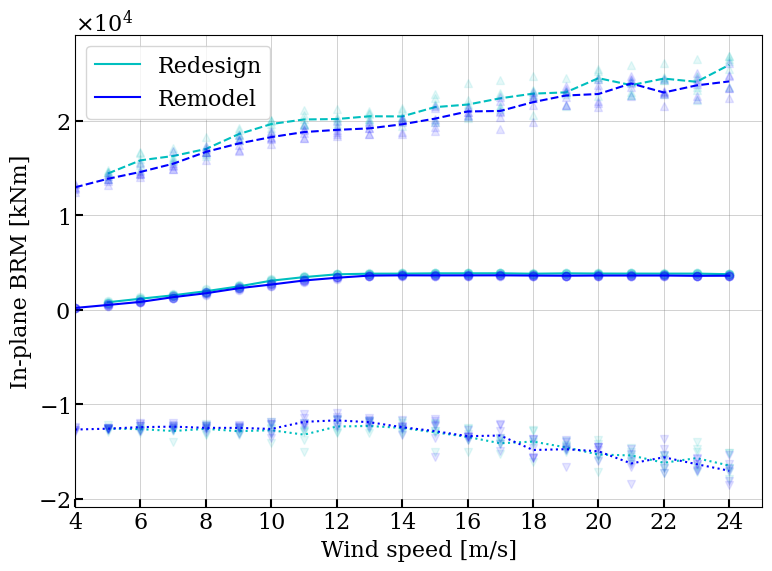

In [15]:
# Ensure the output directory exists
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)

# Generate and save plots for load data
for iplot, chan_id in enumerate(chan_ids_loads):
    fig, ax = plt.subplots(figsize=(8, 6), clear=True)

    # # Plot DTU data
    # ax.plot(loads_DTU[chan_id]['min']['scatter_wind'], loads_DTU[chan_id]['min']['scatter_load'], 'v', alpha=0.1, color='r')
    # ax.plot(loads_DTU[chan_id]['mean']['scatter_wind'], loads_DTU[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='r')
    # ax.plot(loads_DTU[chan_id]['max']['scatter_wind'], loads_DTU[chan_id]['max']['scatter_load'], '^', alpha=0.1, color='r')
    # ax.plot(loads_DTU[chan_id]['min']['ws'], loads_DTU[chan_id]['min']['ave'], linestyle='dotted', color='r')
    # ax.plot(loads_DTU[chan_id]['mean']['ws'], loads_DTU[chan_id]['mean']['ave'], linestyle='solid', color='r', label='DTU 10 MW')
    # ax.plot(loads_DTU[chan_id]['max']['ws'], loads_DTU[chan_id]['max']['ave'], linestyle='dashed', color='r')

    # Plot redesign data
    ax.plot(loads_our[chan_id]['min']['scatter_wind'], loads_our[chan_id]['min']['scatter_load'], 'v', alpha=0.1,   color='c')
    ax.plot(loads_our[chan_id]['mean']['scatter_wind'], loads_our[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='c')
    ax.plot(loads_our[chan_id]['max']['scatter_wind'], loads_our[chan_id]['max']['scatter_load'], '^', alpha=0.1,   color='c')
    ax.plot(loads_our[chan_id]['min']['ws'], loads_our[chan_id]['min']['ave'], linestyle='dotted',  color='c')
    ax.plot(loads_our[chan_id]['mean']['ws'], loads_our[chan_id]['mean']['ave'], linestyle='solid', color='c', label='Redesign')
    ax.plot(loads_our[chan_id]['max']['ws'], loads_our[chan_id]['max']['ave'], linestyle='dashed',  color='c')

    # Plot redesign data
    ax.plot(loads_rem[chan_id]['min']['scatter_wind'],  loads_rem[chan_id]['min']['scatter_load'], 'v', alpha=0.1,  color='b')
    ax.plot(loads_rem[chan_id]['mean']['scatter_wind'], loads_rem[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='b')
    ax.plot(loads_rem[chan_id]['max']['scatter_wind'],  loads_rem[chan_id]['max']['scatter_load'], '^', alpha=0.1,  color='b')
    ax.plot(loads_rem[chan_id]['min']['ws'],  loads_rem[chan_id]['min']['ave'], linestyle='dotted', color='b')
    ax.plot(loads_rem[chan_id]['mean']['ws'], loads_rem[chan_id]['mean']['ave'], linestyle='solid', color='b', label='Remodel')
    ax.plot(loads_rem[chan_id]['max']['ws'],  loads_rem[chan_id]['max']['ave'], linestyle='dashed', color='b')


    # Configure plot appearance
    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    ax.set(xlabel='Wind speed [m/s]', ylabel=f'{chan_title_loads[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    # ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)
    ax.set_ylim(auto=True)  # Automatically set y-axis limits
    ax.xaxis.set_major_locator(MultipleLocator(2))  # Major ticks every 2 units on the x-axis

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    # Save the plot
    filename = f"{output_folder}/{chan_id}_loads.pdf"
    fig.tight_layout()
    #fig.savefig(filename, format='pdf', bbox_inches='tight')
    #plt.close(fig)
    plt.show()

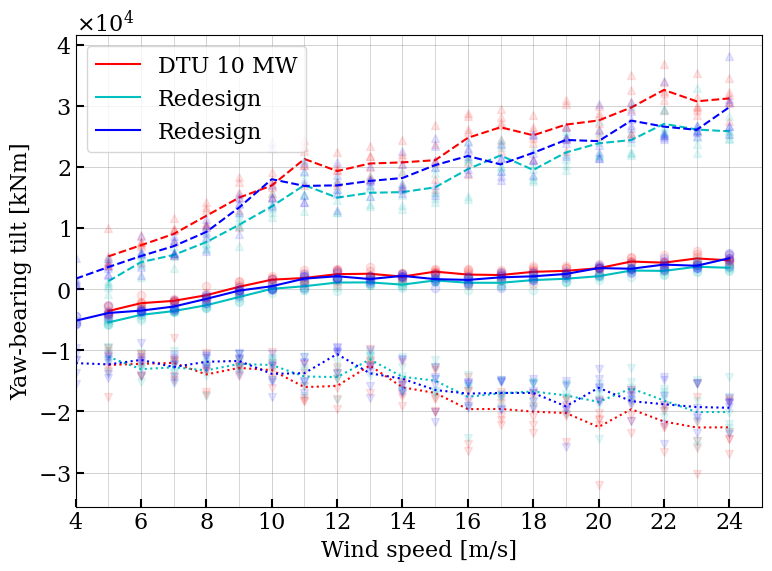

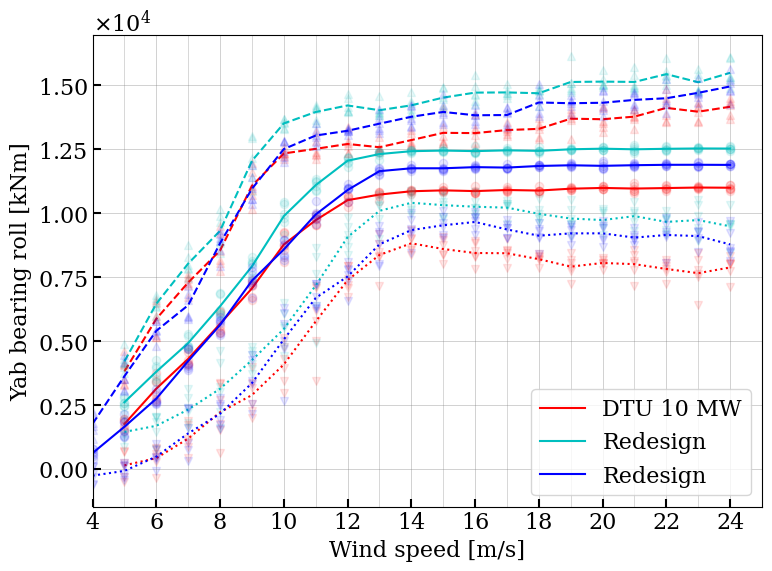

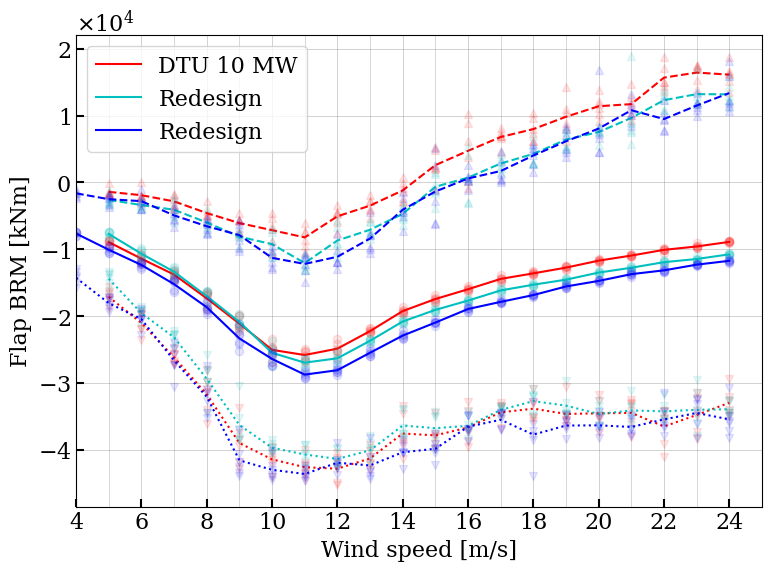

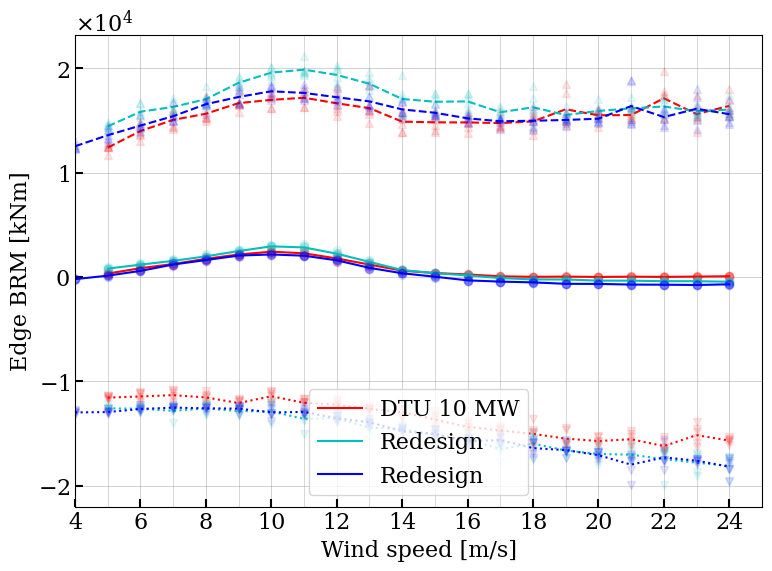

In [16]:
# Ensure the output directory exists
output_folder = 'plots'
os.makedirs(output_folder, exist_ok=True)

chan_ids_loads_optional = ['YbTilt', 'YbRoll', 'FlpBRM', 'EdgBRM']
chan_title_loads_optional = ['Yaw-bearing tilt [kNm]', 'Yab bearing roll [kNm]', 'Flap BRM [kNm]', 'Edge BRM [kNm]']


loads_DTU = load_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_loads_optional)
loads_our = load_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_loads_optional)
loads_rem = load_calculation('remodel/remodel_turb_C12.csv', 'tcb', CHAN_DESCS, chan_ids_loads_optional)

# Generate and save plots for additional load data
for iplot, chan_id in enumerate(chan_ids_loads_optional):
    fig, ax = plt.subplots(figsize=(8, 6), clear=True)

    # Plot DTU data
    ax.plot(loads_DTU[chan_id]['min']['scatter_wind'], loads_DTU[chan_id]['min']['scatter_load'], 'v', alpha=0.1,  color='r')
    ax.plot(loads_DTU[chan_id]['mean']['scatter_wind'], loads_DTU[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='r')
    ax.plot(loads_DTU[chan_id]['max']['scatter_wind'], loads_DTU[chan_id]['max']['scatter_load'], '^', alpha=0.1,  color='r')
    ax.plot(loads_DTU[chan_id]['min']['ws'], loads_DTU[chan_id]['min']['ave'], linestyle='dotted',  color='r')
    ax.plot(loads_DTU[chan_id]['mean']['ws'], loads_DTU[chan_id]['mean']['ave'], linestyle='solid', color='r', label='DTU 10 MW')
    ax.plot(loads_DTU[chan_id]['max']['ws'], loads_DTU[chan_id]['max']['ave'], linestyle='dashed',  color='r')

    # Plot redesign data
    ax.plot(loads_our[chan_id]['min']['scatter_wind'], loads_our[chan_id]['min']['scatter_load'], 'v', alpha=0.1,   color='c')
    ax.plot(loads_our[chan_id]['mean']['scatter_wind'], loads_our[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='c')
    ax.plot(loads_our[chan_id]['max']['scatter_wind'], loads_our[chan_id]['max']['scatter_load'], '^', alpha=0.1,   color='c')
    ax.plot(loads_our[chan_id]['min']['ws'], loads_our[chan_id]['min']['ave'], linestyle='dotted',  color='c')
    ax.plot(loads_our[chan_id]['mean']['ws'], loads_our[chan_id]['mean']['ave'], linestyle='solid', color='c', label='Redesign')
    ax.plot(loads_our[chan_id]['max']['ws'], loads_our[chan_id]['max']['ave'], linestyle='dashed',  color='c')

    # Plot remodel data
    ax.plot(loads_rem[chan_id]['min']['scatter_wind'], loads_rem[chan_id]['min']['scatter_load'], 'v', alpha=0.1,   color='b')
    ax.plot(loads_rem[chan_id]['mean']['scatter_wind'], loads_rem[chan_id]['mean']['scatter_load'], 'o', alpha=0.1, color='b')
    ax.plot(loads_rem[chan_id]['max']['scatter_wind'], loads_rem[chan_id]['max']['scatter_load'], '^', alpha=0.1,   color='b')
    ax.plot(loads_rem[chan_id]['min']['ws'], loads_rem[chan_id]['min']['ave'], linestyle='dotted',  color='b')
    ax.plot(loads_rem[chan_id]['mean']['ws'], loads_rem[chan_id]['mean']['ave'], linestyle='solid', color='b', label='Redesign')
    ax.plot(loads_rem[chan_id]['max']['ws'], loads_rem[chan_id]['max']['ave'], linestyle='dashed',  color='b')


    # Configure plot appearance
    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Grid lines
    ax.set(xlabel='Wind speed [m/s]', ylabel=f'{chan_title_loads_optional[iplot]}', xlim=[4, 25])
    ax.set_ylim(auto=True)  # Automatically set y-axis limits
    ax.xaxis.set_major_locator(MultipleLocator(2))  # Major ticks every 2 units
    ax.xaxis.set_minor_locator(MultipleLocator(1))  # Minor ticks every 1 unit
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Minor tick appearance
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    # Save the plot
    filename = f"{output_folder}/{chan_id}_loads_mean.pdf"
    fig.tight_layout()
    #fig.savefig(filename, format='pdf', bbox_inches='tight')
    #plt.close(fig)
    plt.show()

In [17]:
# single image

'''
# operational and load data
# operational data:  Rotor speed, pitch angle, generator torque, electrical power, and thrust
# loads data: Tower base fore-aft, tower base side-side, shaft torsion, out-of-plane blade-root moment, in-plane blade-root moment
# encouraged to analyse yaw-bearing tilt and roll, blade flap/edge

chan_ids_operational = ['RotSpd', 'BldPit', 'GenTrq', 'ElPow', 'Thrust']
chan_ids_loads = ['TbFA', 'TbSS', 'ShftTrs', 'OoPBRM', 'IPBRM']

chan_title_operational = ['Rot. speed [rad/s]', 'Pitch [deg]', 'Gen. torque [Nm]', 'El. power [W]', 'Thrust [kN]']
chan_title_loads = ['Tower base FA [kNm]', 'Tower base SS [kNm]',
             'Shaft torsion [kNm]', 'Out-of-plane BRM [kNm]', 'In-plane BRM [kNm]']

operational_DTU = load_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_operational)
operational_our = load_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_operational)
operational_rem = load_calculation('remodel/remodel_turb_C12.csv', 'tcb', CHAN_DESCS, chan_ids_operational)
loads_DTU = load_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_loads)
loads_our = load_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_loads)
loads_rem = load_calculation('remodel/remodel_turb_C12.csv', 'tcb', CHAN_DESCS, chan_ids_loads)


fig, axs = plt.subplots(5, 1, figsize=(10, 15), clear=True)

for iplot, chan_id in enumerate(chan_ids_operational):

    ax = axs.flatten()[iplot]

    ax.plot(operational_DTU[chan_id]['min']['scatter_wind'],  operational_DTU[chan_id]['min']['scatter_load'],  'v', alpha = 0.1, color='r')
    ax.plot(operational_DTU[chan_id]['mean']['scatter_wind'], operational_DTU[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='r')
    ax.plot(operational_DTU[chan_id]['max']['scatter_wind'],  operational_DTU[chan_id]['max']['scatter_load'],  '^', alpha = 0.1, color='r')
    ax.plot(operational_our[chan_id]['min']['scatter_wind'],  operational_our[chan_id]['min']['scatter_load'],  'v', alpha = 0.1, color='c')
    ax.plot(operational_our[chan_id]['mean']['scatter_wind'], operational_our[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='c')
    ax.plot(operational_our[chan_id]['max']['scatter_wind'],  operational_our[chan_id]['max']['scatter_load'],  '^', alpha = 0.1, color='c')
    ax.plot(operational_rem[chan_id]['min']['scatter_wind'],  operational_rem[chan_id]['min']['scatter_load'],  'v', alpha = 0.1, color='b')
    ax.plot(operational_rem[chan_id]['mean']['scatter_wind'], operational_rem[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='b')
    ax.plot(operational_rem[chan_id]['max']['scatter_wind'],  operational_rem[chan_id]['max']['scatter_load'],  '^', alpha = 0.1, color='b')


    ax.plot(operational_DTU[chan_id]['min']['ws'],  operational_DTU[chan_id]['min']['ave'],  linestyle = 'dotted', color='r')
    ax.plot(operational_DTU[chan_id]['mean']['ws'], operational_DTU[chan_id]['mean']['ave'], linestyle = 'solid',  color='r', label='DTU 10 MW'if iplot == 0 else "")
    ax.plot(operational_DTU[chan_id]['max']['ws'],  operational_DTU[chan_id]['max']['ave'],  linestyle = 'dashed', color='r')
    ax.plot(operational_our[chan_id]['min']['ws'],  operational_our[chan_id]['min']['ave'],  linestyle = 'dotted', color='c')
    ax.plot(operational_our[chan_id]['mean']['ws'], operational_our[chan_id]['mean']['ave'], linestyle = 'solid',  color='c', label='redesign'if iplot == 0 else "")
    ax.plot(operational_our[chan_id]['max']['ws'],  operational_our[chan_id]['max']['ave'],  linestyle = 'dashed', color='c')
    ax.plot(operational_rem[chan_id]['min']['ws'],  operational_rem[chan_id]['min']['ave'],  linestyle = 'dotted', color='b')
    ax.plot(operational_rem[chan_id]['mean']['ws'], operational_rem[chan_id]['mean']['ave'], linestyle = 'solid',  color='b', label='remodel'if iplot == 0 else "")
    ax.plot(operational_rem[chan_id]['max']['ws'],  operational_rem[chan_id]['max']['ave'],  linestyle = 'dashed', color='b')

    


    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)
    ax.set(xlabel='Wind speed [m/s]' if iplot >  3 else None,
           ylabel=f'{chan_title_operational[iplot]}', xlim=[4, 25])
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)


handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=2)
fig.tight_layout()
fig.savefig(f'plots/operational.pdf', format='pdf',bbox_inches='tight')
plt.show()




fig, axs = plt.subplots(5, 1, figsize=(10, 15), clear=True)
for iplot, chan_id in enumerate(chan_ids_loads):

    ax = axs.flatten()[iplot]

    ax.plot(loads_DTU[chan_id]['min']['scatter_wind'],  loads_DTU[chan_id]['min']['scatter_load'],  'v', alpha = 0.1, color='r')
    ax.plot(loads_DTU[chan_id]['mean']['scatter_wind'], loads_DTU[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='r')
    ax.plot(loads_DTU[chan_id]['max']['scatter_wind'],  loads_DTU[chan_id]['max']['scatter_load'],  '^', alpha = 0.1, color='r')
    ax.plot(loads_our[chan_id]['min']['scatter_wind'],  loads_our[chan_id]['min']['scatter_load'],  'v', alpha = 0.1, color='c')
    ax.plot(loads_our[chan_id]['mean']['scatter_wind'], loads_our[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='c')
    ax.plot(loads_our[chan_id]['max']['scatter_wind'],  loads_our[chan_id]['max']['scatter_load'],  '^', alpha = 0.1, color='c')
    ax.plot(loads_rem[chan_id]['min']['scatter_wind'],  loads_rem[chan_id]['min']['scatter_load'],  'v', alpha = 0.1, color='b')
    ax.plot(loads_rem[chan_id]['mean']['scatter_wind'], loads_rem[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='b')
    ax.plot(loads_rem[chan_id]['max']['scatter_wind'],  loads_rem[chan_id]['max']['scatter_load'],  '^', alpha = 0.1, color='b')


    ax.plot(loads_DTU[chan_id]['min']['ws'],  loads_DTU[chan_id]['min']['ave'], linestyle = 'dotted', color='r')
    ax.plot(loads_DTU[chan_id]['mean']['ws'], loads_DTU[chan_id]['mean']['ave'], linestyle = 'solid', color='r', label='DTU 10 MW'if iplot == 0 else "")
    ax.plot(loads_DTU[chan_id]['max']['ws'],  loads_DTU[chan_id]['max']['ave'], linestyle = 'dashed', color='r')
    ax.plot(loads_our[chan_id]['min']['ws'],  loads_our[chan_id]['min']['ave'], linestyle = 'dotted', color='c')
    ax.plot(loads_our[chan_id]['mean']['ws'], loads_our[chan_id]['mean']['ave'], linestyle = 'solid', color='c', label='redesign'if iplot == 0 else "")
    ax.plot(loads_our[chan_id]['max']['ws'],  loads_our[chan_id]['max']['ave'], linestyle = 'dashed', color='c')
    ax.plot(loads_rem[chan_id]['mean']['ws'], loads_rem[chan_id]['mean']['ave'], linestyle = 'solid', color='b', label='remodel'if iplot == 0 else "")
    ax.plot(loads_rem[chan_id]['min']['ws'],  loads_rem[chan_id]['min']['ave'], linestyle = 'dotted', color='b')
    ax.plot(loads_rem[chan_id]['max']['ws'],  loads_rem[chan_id]['max']['ave'], linestyle = 'dashed', color='b')


    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  3 else None,
           ylabel=f'{chan_title_loads[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=3)
fig.tight_layout()
#fig.savefig(f'plots/loads.pdf', format='pdf',bbox_inches='tight')
plt.show()

'''

'\n# operational and load data\n# operational data:  Rotor speed, pitch angle, generator torque, electrical power, and thrust\n# loads data: Tower base fore-aft, tower base side-side, shaft torsion, out-of-plane blade-root moment, in-plane blade-root moment\n# encouraged to analyse yaw-bearing tilt and roll, blade flap/edge\n\nchan_ids_operational = [\'RotSpd\', \'BldPit\', \'GenTrq\', \'ElPow\', \'Thrust\']\nchan_ids_loads = [\'TbFA\', \'TbSS\', \'ShftTrs\', \'OoPBRM\', \'IPBRM\']\n\nchan_title_operational = [\'Rot. speed [rad/s]\', \'Pitch [deg]\', \'Gen. torque [Nm]\', \'El. power [W]\', \'Thrust [kN]\']\nchan_title_loads = [\'Tower base FA [kNm]\', \'Tower base SS [kNm]\',\n             \'Shaft torsion [kNm]\', \'Out-of-plane BRM [kNm]\', \'In-plane BRM [kNm]\']\n\noperational_DTU = load_calculation(\'dtu_10mw/dtu_10mw_turb_stats.hdf5\', \'tca\', CHAN_DESCS, chan_ids_operational)\noperational_our = load_calculation(\'our_design/Group1_turb_C8.csv\', \'tcb\', CHAN_DESCS, chan_ids_op

In [18]:
# additional plots

'''
chan_ids_loads = ['YbTilt', 'YbRoll', 'FlpBRM', 'EdgBRM']
chan_title_loads = ['Yaw-bearing tilt [kNm]', 'Yab bearing roll [kNm]', 'Flap BRM [kNm]', 'Edge BRM [kNm]']


loads_DTU = load_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids_loads)
loads_our = load_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids_loads)
loads_rem = load_calculation('remodel/remodel_turb_C12.csv', 'tcb', CHAN_DESCS, chan_ids_loads)



fig, axs = plt.subplots(4, 1, figsize=(10, 12), clear=True)
for iplot, chan_id in enumerate(chan_ids_loads):

    ax = axs.flatten()[iplot]

    ax.plot(loads_DTU[chan_id]['min']['scatter_wind'],  loads_DTU[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='r')
    ax.plot(loads_DTU[chan_id]['mean']['scatter_wind'], loads_DTU[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='r')
    ax.plot(loads_DTU[chan_id]['max']['scatter_wind'],  loads_DTU[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='r')
    ax.plot(loads_our[chan_id]['min']['scatter_wind'],  loads_our[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='b')
    ax.plot(loads_our[chan_id]['mean']['scatter_wind'], loads_our[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='b')
    ax.plot(loads_our[chan_id]['max']['scatter_wind'],  loads_our[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='b')
    ax.plot(loads_rem[chan_id]['min']['scatter_wind'],  loads_rem[chan_id]['min']['scatter_load'], 'v', alpha = 0.1, color='m')
    ax.plot(loads_rem[chan_id]['mean']['scatter_wind'], loads_rem[chan_id]['mean']['scatter_load'], 'o', alpha = 0.1, color='m')
    ax.plot(loads_rem[chan_id]['max']['scatter_wind'],  loads_rem[chan_id]['max']['scatter_load'], '^', alpha = 0.1, color='m')


    ax.plot(loads_DTU[chan_id]['min']['ws'],  loads_DTU[chan_id]['min']['ave'], linestyle = 'dotted', color='r')
    ax.plot(loads_DTU[chan_id]['mean']['ws'], loads_DTU[chan_id]['mean']['ave'], linestyle = 'solid', color='r', label='DTU 10 MW'if iplot == 0 else "")
    ax.plot(loads_DTU[chan_id]['max']['ws'],  loads_DTU[chan_id]['max']['ave'], linestyle = 'dashed', color='r')
    ax.plot(loads_our[chan_id]['min']['ws'],  loads_our[chan_id]['min']['ave'], linestyle = 'dotted', color='b')
    ax.plot(loads_our[chan_id]['mean']['ws'], loads_our[chan_id]['mean']['ave'], linestyle = 'solid', color='b', label='redesign'if iplot == 0 else "")
    ax.plot(loads_our[chan_id]['max']['ws'],  loads_our[chan_id]['max']['ave'], linestyle = 'dashed', color='b')
    ax.plot(loads_rem[chan_id]['min']['ws'],  loads_rem[chan_id]['min']['ave'], linestyle = 'dotted', color='m')
    ax.plot(loads_rem[chan_id]['mean']['ws'], loads_rem[chan_id]['mean']['ave'], linestyle = 'solid', color='m', label='remodel'if iplot == 0 else "")
    ax.plot(loads_rem[chan_id]['max']['ws'],  loads_rem[chan_id]['max']['ave'], linestyle = 'dashed', color='m')


    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  2 else None,
           ylabel=f'{chan_title_loads[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=2)
fig.tight_layout()
#fig.savefig(f'plots/loads_additional.pdf', format='pdf',bbox_inches='tight')
plt.show()

'''

'\nchan_ids_loads = [\'YbTilt\', \'YbRoll\', \'FlpBRM\', \'EdgBRM\']\nchan_title_loads = [\'Yaw-bearing tilt [kNm]\', \'Yab bearing roll [kNm]\', \'Flap BRM [kNm]\', \'Edge BRM [kNm]\']\n\n\nloads_DTU = load_calculation(\'dtu_10mw/dtu_10mw_turb_stats.hdf5\', \'tca\', CHAN_DESCS, chan_ids_loads)\nloads_our = load_calculation(\'our_design/Group1_turb_C8.csv\', \'tcb\', CHAN_DESCS, chan_ids_loads)\nloads_rem = load_calculation(\'remodel/remodel_turb_C12.csv\', \'tcb\', CHAN_DESCS, chan_ids_loads)\n\n\n\nfig, axs = plt.subplots(4, 1, figsize=(10, 12), clear=True)\nfor iplot, chan_id in enumerate(chan_ids_loads):\n\n    ax = axs.flatten()[iplot]\n\n    ax.plot(loads_DTU[chan_id][\'min\'][\'scatter_wind\'],  loads_DTU[chan_id][\'min\'][\'scatter_load\'], \'v\', alpha = 0.1, color=\'r\')\n    ax.plot(loads_DTU[chan_id][\'mean\'][\'scatter_wind\'], loads_DTU[chan_id][\'mean\'][\'scatter_load\'], \'o\', alpha = 0.1, color=\'r\')\n    ax.plot(loads_DTU[chan_id][\'max\'][\'scatter_wind\'],  loads

## TOWER CLEARANCE

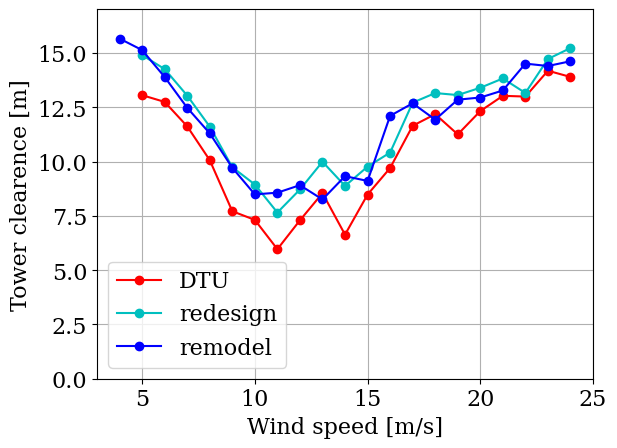

In [19]:
# tower clearance

clearance_DTU = twr_clr_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS)
clearance_our = twr_clr_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS)
clearance_rem = twr_clr_calculation('remodel/remodel_turb_stats.csv', 'tcb', CHAN_DESCS)

plt.figure()
plt.plot(clearance_DTU['ws'], clearance_DTU['twr_clr'], '-o',  color='r', label='DTU')
plt.plot(clearance_our['ws'], clearance_our['twr_clr'], '-o',  color='c', label='redesign')
plt.plot(clearance_rem['ws'], clearance_rem['twr_clr'], '-o',  color='b', label='remodel')
plt.grid()
plt.ylim(0,max( clearance_DTU['twr_clr'])*1.2)
plt.ylabel('Tower clearence [m]')
plt.xlabel('Wind speed [m/s]')
plt.legend()
#plt.savefig('plots/tower_clearance.pdf', format='pdf',bbox_inches='tight')

plt.show()

## DEL

   element     |   R eql DTU  |    R eql our  |   R eql rem    
   TbFA        |   129826.229    | 149323.556 | 116150.990 
   TbSS        |    55207.146    | 119757.242 |  38546.994 
   YbTilt      |    32488.018    |  23150.634 |  24574.291 
   YbRoll      |     4039.541    |   3857.572 |   3533.095 
   ShftTrs     |     2839.465    |   2649.801 |   2736.333 
   IPBRM       |    31017.460    |  32244.185 |  31436.639 
   EdgBRM      |    29182.724    |  31700.970 |  30833.925 


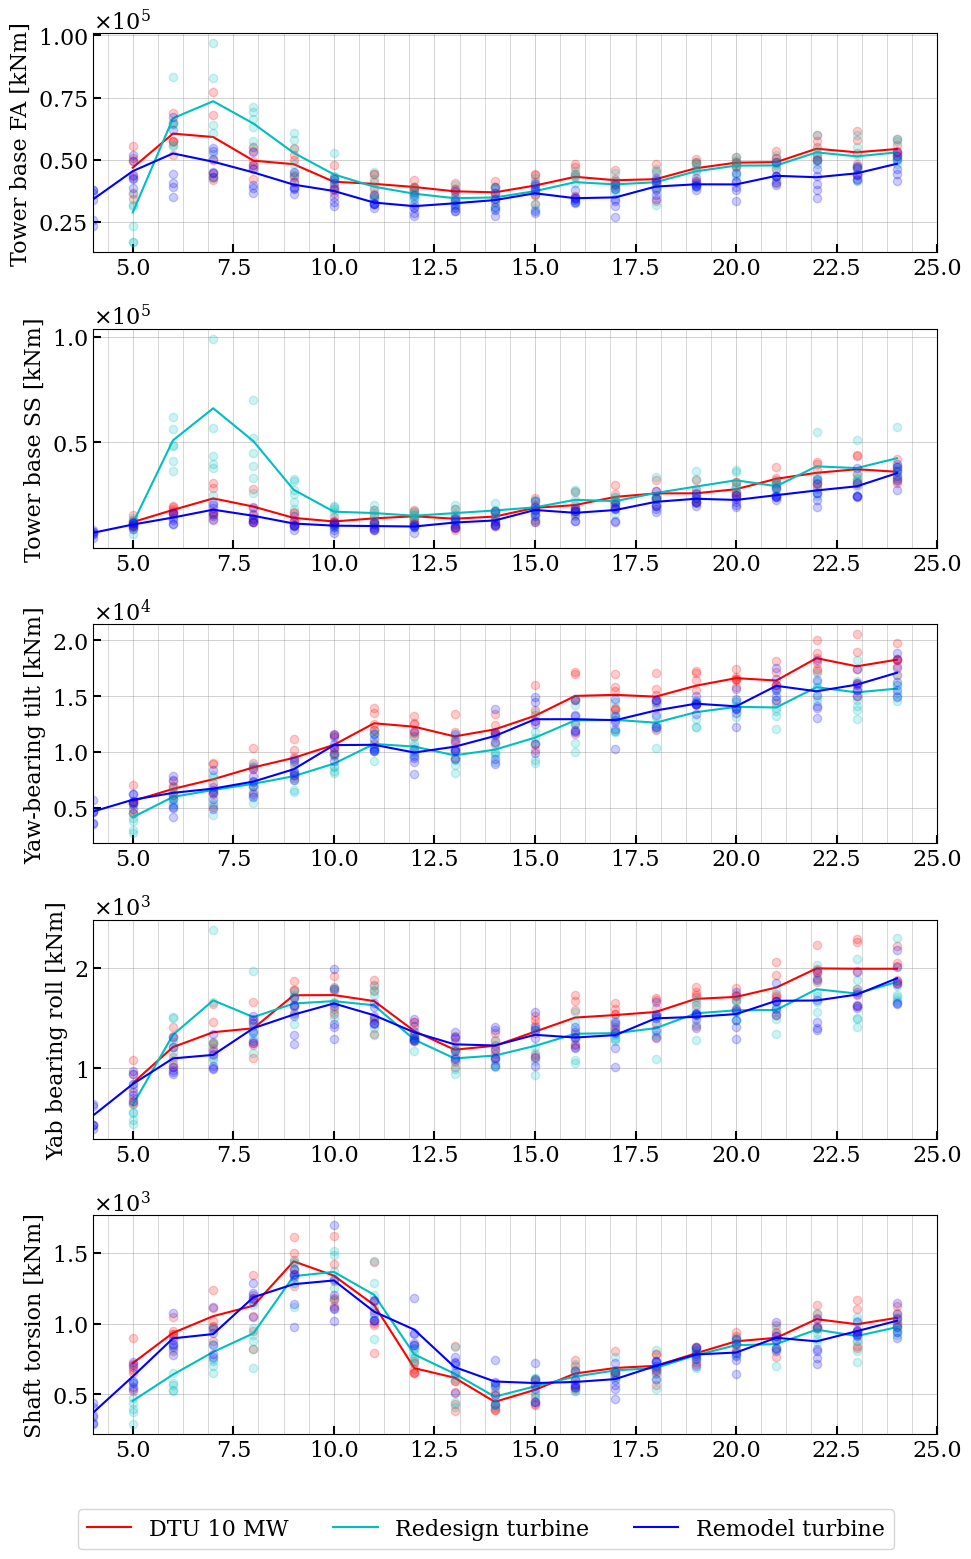

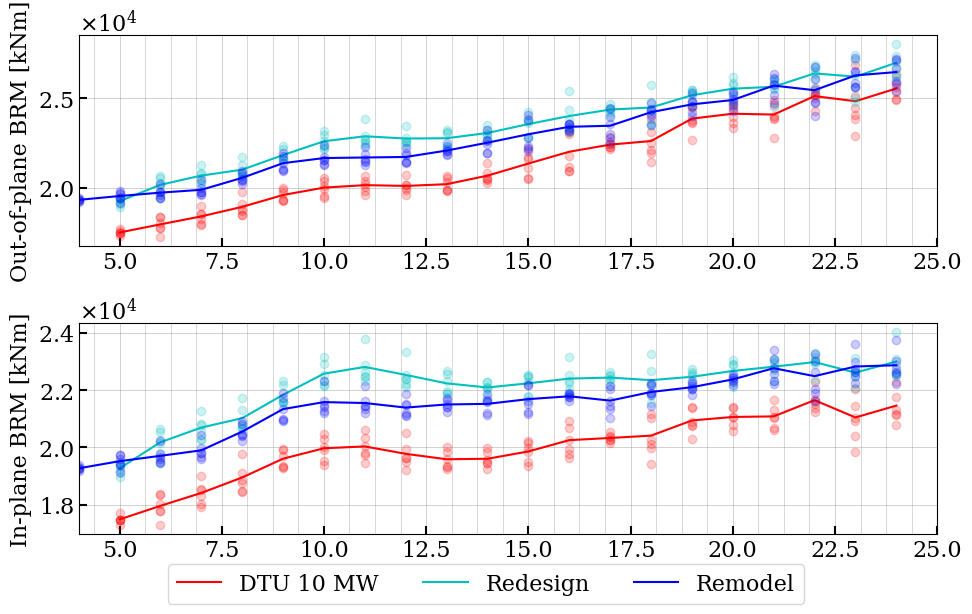

In [20]:
# fatigue analysis

# list of considered elements
wohler_4 = ['TbFA', 'TbSS', 'YbTilt', 'YbRoll', 'ShftTrs']
#wohler_10 =  ['OoPBRM', 'IPBRM','EdgBRM']
wohler_10 =  ['IPBRM','EdgBRM']

wohler_4_title = ['Tower base FA [kNm]', 'Tower base SS [kNm]',
                  'Yaw-bearing tilt [kNm]', 'Yab bearing roll [kNm]','Shaft torsion [kNm]']
wohler_10_title = ['Out-of-plane BRM [kNm]', 'In-plane BRM [kNm]']


data_DTU = DEL_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, wohler_4, wohler_10)
data_our = DEL_calculation('our_design/Group1_turb_C8.csv', 'tcb',  CHAN_DESCS, wohler_4, wohler_10)
data_rem = DEL_calculation('remodel/remodel_turb_C12.csv', 'tcb',  CHAN_DESCS, wohler_4, wohler_10)

printing = True
if printing:
    print(f'   element     |   R eql DTU  |    R eql our  |   R eql rem    ')
    for iplot, chan_id in enumerate(wohler_4 + wohler_10):
        print(f"   {chan_id:10}  |   {data_DTU[chan_id]['R_eql']:10.3f}    | {data_our[chan_id]['R_eql']:10.3f} | {data_rem[chan_id]['R_eql']:10.3f} ")



fig, axs = plt.subplots(5, 1, figsize=(10, 15), clear=True)

for iplot, chan_id in enumerate(wohler_4):

    ax = axs.flatten()[iplot]
    ax.plot(data_DTU[chan_id]['scatter_wind'], data_DTU[chan_id]['scatter_load'], 'o', alpha = 0.2, color='r')
    ax.plot(data_DTU[chan_id]['ws'], data_DTU[chan_id]['R_eq'], color='r', label='DTU 10 MW'if iplot == 0 else "")
    

    ax.plot(data_our[chan_id]['scatter_wind'], data_our[chan_id]['scatter_load'], 'o', alpha = 0.2, color='c')
    ax.plot(data_our[chan_id]['ws'], data_our[chan_id]['R_eq'], color='c', label='Redesign turbine'if iplot == 0 else "")

    ax.plot(data_rem[chan_id]['scatter_wind'], data_rem[chan_id]['scatter_load'], 'o', alpha = 0.2, color='b')
    ax.plot(data_rem[chan_id]['ws'], data_rem[chan_id]['R_eq'], color='b', label='Remodel turbine'if iplot == 0 else "")


    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  4 else None,
           ylabel=f'{wohler_4_title[iplot]}', xlim=[4, 25])
    
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)
fig.tight_layout()
fig.savefig(f'plots/DEL_steel.pdf', format='pdf',bbox_inches='tight')
plt.show()


fig, axs = plt.subplots(2, 1, figsize=(10, 6), clear=True)

for iplot, chan_id in enumerate(wohler_10):

    ax = axs.flatten()[iplot]
    ax.plot(data_DTU[chan_id]['scatter_wind'], data_DTU[chan_id]['scatter_load'], 'o', alpha = 0.2, color='r')
    ax.plot(data_DTU[chan_id]['ws'], data_DTU[chan_id]['R_eq'], color='r', label='DTU 10 MW'if iplot == 0 else "")
    ax.plot(data_our[chan_id]['scatter_wind'], data_our[chan_id]['scatter_load'], 'o', alpha = 0.2, color='c')
    ax.plot(data_our[chan_id]['ws'], data_our[chan_id]['R_eq'], color='c', label='Redesign'if iplot == 0 else "")
    ax.plot(data_rem[chan_id]['scatter_wind'], data_rem[chan_id]['scatter_load'], 'o', alpha = 0.2, color='b')
    ax.plot(data_rem[chan_id]['ws'], data_rem[chan_id]['R_eq'], color='b', label='Remodel'if iplot == 0 else "")


    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  1 else None,
           ylabel=f'{wohler_10_title[iplot]}', xlim=[4, 25])
    
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)
fig.tight_layout()
#fig.savefig(f'plots/DEL_composites.pdf', format='pdf',bbox_inches='tight')
plt.show()



## EXTREME VALUES

 name       |   DTU       | redesign
 TbFA       | 364297.4736 | 339878.6631
 TbSS       | 117720.3153 | 128547.8976
 YbTilt     | 54987.89063 | 45624.71667
 YbRoll     | 23907.45795 | 26146.5488
 ShftTrs    | 20365.17133 | 23640.8508
 OoPBRM     | 72275.13831 | 69683.39539
 IPBRM      | 40770.70642 | 43775.12823


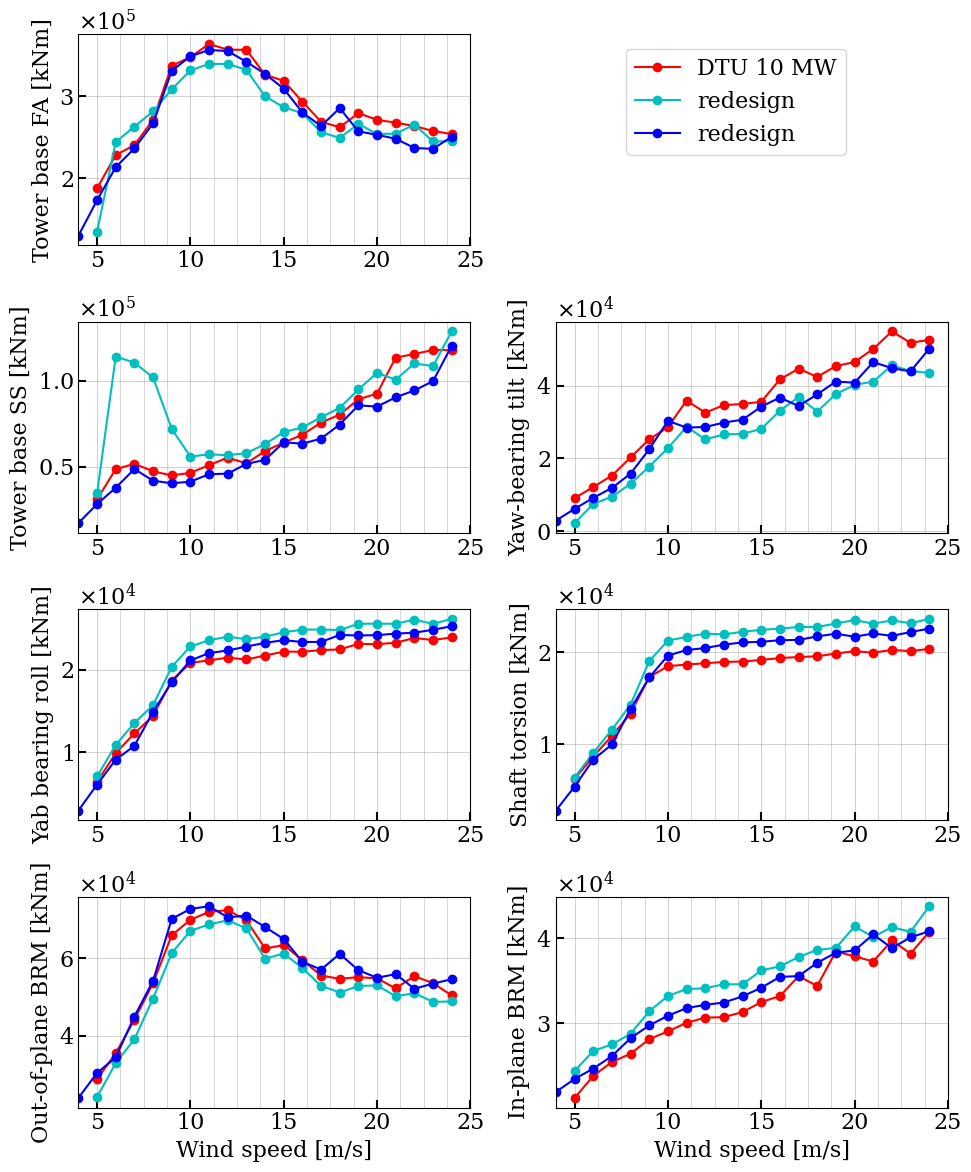

In [21]:
# extreme values

chan_ids = ['TbFA', 'TbSS', 'YbTilt', 'YbRoll', 'ShftTrs', 'OoPBRM', 'IPBRM']
chan_title = ['Tower base FA [kNm]', 'Tower base SS [kNm]','Yaw-bearing tilt [kNm]', 'Yab bearing roll [kNm]',
             'Shaft torsion [kNm]', 'Out-of-plane BRM [kNm]', 'In-plane BRM [kNm]']

extreme_DTU = load_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, chan_ids)
extreme_our = load_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS, chan_ids)
extreme_rem = load_calculation('remodel/remodel_turb_C12.csv', 'tcb', CHAN_DESCS, chan_ids)


extreme_list_DTU = []
extreme_list_our = []
extreme_list_rem = []


fig, axs = plt.subplots(4, 2, figsize=(10, 12), clear=True)
plot_positions = [(0, 0), 
                  (1, 0), (1, 1),
                  (2, 0), (2, 1),
                  (3, 0), (3, 1),] 

for iplot, chan_id in enumerate(chan_ids):

    row, col = plot_positions[iplot]  # Get row and column indices for each plot
    ax = axs[row, col]

    # plot dtu
    if max(extreme_DTU[chan_id]['max']['ave']) > max(abs(extreme_DTU[chan_id]['min']['ave'])):
        extreme_array_DTU = extreme_DTU[chan_id]['max']['ave']*1.35*1.25
    else:
        extreme_array_DTU = abs(extreme_DTU[chan_id]['min']['ave'])*1.35*1.25
    extreme_list_DTU.append(max(extreme_array_DTU))
    ax.plot(extreme_DTU[chan_id]['mean']['ws'], extreme_array_DTU, marker='o', color='r',  label='DTU 10 MW'if iplot == 0 else "")

    # plot redesign
    if max(extreme_our[chan_id]['max']['ave']) > max(abs(extreme_our[chan_id]['min']['ave'])):
        extreme_array_our = extreme_our[chan_id]['max']['ave'] *1.35*1.25
    else:
        extreme_array_our = abs(extreme_our[chan_id]['min']['ave'] )*1.35*1.25
    extreme_list_our.append(max(extreme_array_our))
    ax.plot(extreme_our[chan_id]['mean']['ws'], extreme_array_our, marker='o', color='c',  label='redesign'if iplot == 0 else "")

    # plot remodel
    if max(extreme_rem[chan_id]['max']['ave']) > max(abs(extreme_rem[chan_id]['min']['ave'])):
        extreme_array_rem = extreme_rem[chan_id]['max']['ave'] *1.35*1.25
    else:
        extreme_array_rem = abs(extreme_rem[chan_id]['min']['ave'] )*1.35*1.25
    extreme_list_rem.append(max(extreme_array_rem))
    ax.plot(extreme_rem[chan_id]['mean']['ws'], extreme_array_rem, marker='o', color='b',  label='redesign'if iplot == 0 else "")


    ax.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)  # Finer grid with dashed lines
    ax.set(xlabel='Wind speed [m/s]' if iplot >  4 else None,
           ylabel=f'{chan_title[iplot]}', xlim=[4, 25])
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # 4 minor ticks per major tick on the x-axis
    ax.tick_params(axis='x', which='minor', length=4, width=0, color='black')  # Adjust the appearance of minor ticks
    ax.tick_params(axis='both', which='major', length=6, width=1.5, color='black', direction='in', grid_color='gray', grid_alpha=0.5)

fig.delaxes(axs[0, 1])
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.75, 0.85), ncol=1)
fig.tight_layout()
fig.savefig(f'plots/extreme_loads.pdf', format='pdf',bbox_inches='tight')


print(' name       |   DTU       | redesign')
for i in range(len(extreme_list_DTU)):
    print(f' {chan_ids[i]:10} | {extreme_list_DTU[i]:6.10} | {extreme_list_our[i]:5.10}')

plt.show()



# AEP

DTU 1a        : 49.268
DTU 3b        : 33.946575
redesign 1a   : 48.608411
redesign 3b   : 33.542751
remodel 1a    : 50.294865
remodel 3b C12: 34.786457
remodel 3b C1 : 34.424614


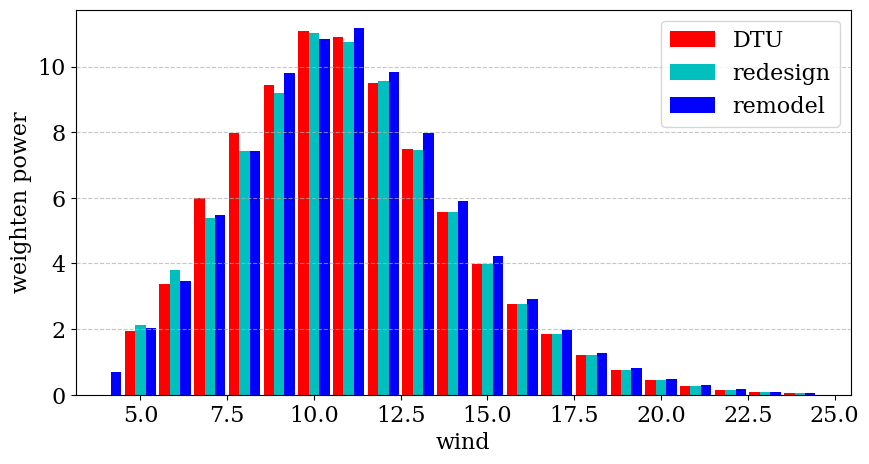

In [23]:
## Calculating AEP

DTU_AEP_1a = AEP_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, wind_class=1)
DTU_AEP_3b = AEP_calculation('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tcb', CHAN_DESCS, wind_class=3)
our_AEP_1a = AEP_calculation('our_design/Group1_turb_C8.csv', 'tca', CHAN_DESCS, wind_class=1)
our_AEP_3b = AEP_calculation('our_design/Group1_turb_C8.csv', 'tcb', CHAN_DESCS, wind_class=3)
rem_AEP_1a = AEP_calculation('remodel/remodel_turb_C12.csv', 'tca', CHAN_DESCS, wind_class=1)
rem_AEP_3b = AEP_calculation('remodel/remodel_turb_C12_smallShaving.csv', 'tcb', CHAN_DESCS, wind_class=3)
rem_AEP_3bC1 = AEP_calculation('remodel/remodel_turb_C1.csv', 'tcb', CHAN_DESCS, wind_class=3)


print(f"DTU 1a        : {DTU_AEP_1a['AEP']:3.8}")
print(f"DTU 3b        : {DTU_AEP_3b['AEP']:3.8}")
print(f"redesign 1a   : {our_AEP_1a['AEP']:3.8}")
print(f"redesign 3b   : {our_AEP_3b['AEP']:3.8}")
print(f"remodel 1a    : {rem_AEP_1a['AEP']:3.8}")
print(f"remodel 3b C12: {rem_AEP_3b['AEP']:3.8}")
print(f"remodel 3b C1 : {rem_AEP_3bC1['AEP']:3.8}")


# plot weighted aep comparison
DTU_ws = DTU_AEP_3b['ws']
DTU_wp = DTU_AEP_3b['power'] * DTU_AEP_3b['prob']*365*60 / 1000
rem_ws = rem_AEP_3b['ws']
rem_wp = rem_AEP_3b['power'] * rem_AEP_3b['prob']*365*60 / 1000
our_ws = our_AEP_3b['ws']
our_wp = our_AEP_3b['power'] * our_AEP_3b['prob']*365*60 / 1000


bar_width = 0.3
nhist = 3

DTU_ws = DTU_ws - 3*bar_width/nhist
our_ws = our_ws 
rem_ws = rem_ws + 3*bar_width/nhist

cc = ['#FF0000', '#F1C40F', '#2980B9']

plt.figure(figsize=(10,5))
plt.bar(DTU_ws, DTU_wp, width=bar_width, label='DTU', color='r')
plt.bar(our_ws, our_wp, width=bar_width, label='redesign', color='c')
plt.bar(rem_ws, rem_wp, width=bar_width, label='remodel', color='b')

# Add labels, legend, and grid
plt.xlabel("wind")
plt.ylabel("weighten power")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


## STATISTCS

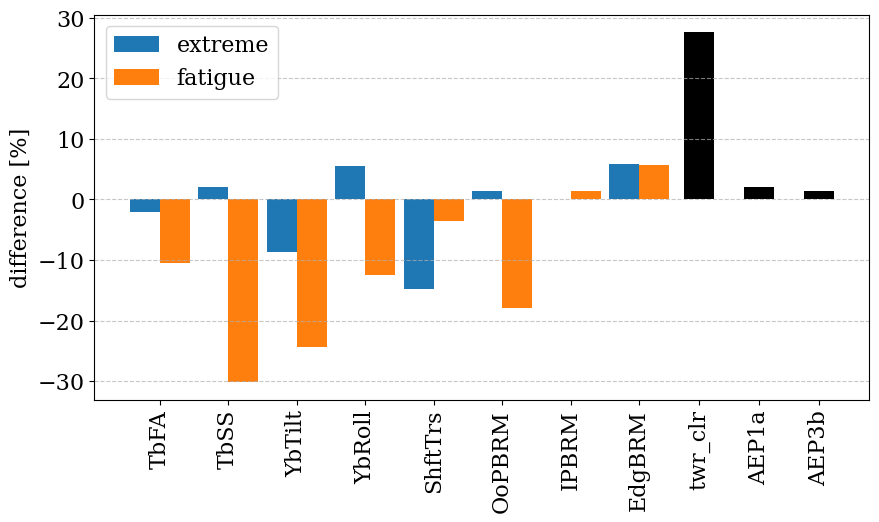

In [63]:
# table of extreme loads, fatigue loads, AEP 
# for desired channels: 
# DTU and whatever

list_channels = ['TbFA','TbSS','YbTilt','YbRoll','ShftTrs' ,'OoPBRM','IPBRM' ,'EdgBRM' ]


def summary_value(STATS_PATH, SUBFOLDER, CHAN_DESCS, list_channels):

    result = {}

    # extreme loads
    extreme = load_calculation(STATS_PATH, SUBFOLDER, CHAN_DESCS, list_channels)

    extreme_list = []
    for iplot, chan_id in enumerate(list_channels):
        if max(extreme[chan_id]['max']['ave']) > max(abs(extreme[chan_id]['min']['ave'])):
            extreme_array = extreme[chan_id]['max']['ave']*1.35*1.25
        else:
            extreme_array = abs(extreme[chan_id]['min']['ave'])*1.35*1.25
        extreme_list.append(max(extreme_array))

    result['extreme'] = np.array(extreme_list)


    # fatigue loads
    wohler_4_all = ['TbFA', 'TbSS', 'YbTilt', 'YbRoll', 'ShftTrs']
    wohler_10_all = ['OoPBRM', 'IPBRM','EdgBRM']

    fatigue_list = []

    for element in list_channels:
        if element in wohler_4_all:
            wohler_10 = []
            wohler_4 = [element]
            fatigue = DEL_calculation(STATS_PATH, SUBFOLDER, CHAN_DESCS, wohler_4, wohler_10,)
            fatigue_list.append(fatigue[element]['R_eql'])
        if element in wohler_10_all:
            wohler_4 = []
            wohler_10 = [element]
            fatigue = DEL_calculation(STATS_PATH, SUBFOLDER, CHAN_DESCS, wohler_4, wohler_10,)
            fatigue_list.append(fatigue[element]['R_eql'])
    
    result['fatigue'] = np.array(fatigue_list)

    # tower clearance
    clearance = twr_clr_calculation(STATS_PATH, SUBFOLDER, CHAN_DESCS)
    clearance_value = min(clearance['twr_clr'])
    result['tower_clearance'] = clearance_value


    # AEP
    AEP_1a = AEP_calculation(STATS_PATH,'tca', CHAN_DESCS, wind_class=1)
    AEP_3b = AEP_calculation(STATS_PATH,'tcb', CHAN_DESCS, wind_class=3)
    AEP_list = [AEP_1a['AEP'], AEP_3b['AEP']]
    result['AEP'] = np.array(AEP_list)

    return result


summary_DTU = summary_value('dtu_10mw/dtu_10mw_turb_stats.hdf5', 'tca', CHAN_DESCS, list_channels)
summary_rem = summary_value('remodel/remodel_turb_C12.csv', 'tcb', CHAN_DESCS, list_channels)

# shaft overdesigned
idx = list_channels.index('ShftTrs')
summary_DTU['extreme'][idx] = summary_DTU['extreme'][idx]*1.3




lim_channels = 8
separation = 1
bar_width = 0.5

x_channels = np.linspace(0, lim_channels, len(list_channels))
x_clearance = np.array([lim_channels + separation])
x_AEP = np.array([x_clearance + separation, x_clearance + 2*separation]).flatten()


y_extreme = (summary_rem['extreme'] - summary_DTU['extreme']) / summary_DTU['extreme'] * 100
y_fatigue = (summary_rem['fatigue'] - summary_DTU['fatigue']) / summary_DTU['fatigue'] * 100
y_clearance = (summary_rem['tower_clearance'] - summary_DTU['tower_clearance']) / summary_DTU['tower_clearance']*100
y_AEP = (summary_rem['AEP'] - summary_DTU['AEP']) / summary_DTU['AEP']*100

x_positions = np.concatenate((x_channels, x_clearance, x_AEP))
list_channels_all = np.concatenate((list_channels, ['twr_clr'], ['AEP1a', 'AEP3b']))

plt.figure(figsize=(10,5))
plt.bar(x_channels - bar_width/2, y_extreme, width=bar_width, label='extreme')
plt.bar(x_channels + bar_width/2, y_fatigue, width=bar_width, label='fatigue')
plt.bar(x_clearance, y_clearance, width=bar_width,  color='k')
plt.bar(x_AEP, y_AEP, width=bar_width, color='k')

# Add labels, legend, and grid
plt.ylabel("difference [%]")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(x_positions, list_channels_all, rotation = 90)

# Show the plot
plt.show()

